# Reaction time analyses with Python

**Dr. Zhuanghua Shi, 2020**

This tutorial serves as hands-on for the lecture "Psychophysics". In this tutorial, first we will go through the basic useage of [pandas](http://pandas.pydata.org) using chain rules. Some example for chain rules are from  [Tom Augspurger's notebook](http://nbviewer.jupyter.org/gist/TomAugspurger/6e052140eaa5fdb6e8c0).

Note: `seaborn`, `matplotlib.pyplot` and `altair` provide plots for python, which we will not cover in this tutorial. 

In [ ]:
# Some prep work to get the data from R and into pandas
%matplotlib inline

# pandas for data process, seaborn for plotting, in addition, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

pd.set_option("display.max_rows", 15)

## 1. Import data to Colab Cloud (Optional)

Colab provides cloud computing and collaboration with python notebook, but not natively for data sharing. Fortunately, there are several ways for sharing data. 



### Uploading files from your local file system

You share the data using other cloud methods, and then upload files locally. `files.upload` returns a dictionary of the files which were uploaded.
The dictionary is keyed by the file name, the value is the data which was uploaded.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Another example, upload a csv file and import as pandas table.



In [ ]:
import io
from google.colab import files

uploaded = files.upload()
key, value = uploaded.popitem()
df = pd.read_csv(io.BytesIO(value))
df.head()

### Downloading files to your local file system

`files.download` will invoke a browser download of the file to the user's local computer.


In [ ]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

### Mounting Google Drive locally

The example below shows how to mount your Google Drive in your virtual machine using an authorization code, and shows a couple of ways to write & read files there. Once executed, observe the new file (`foo.txt`) is visible in https://drive.google.com/

Note this only supports reading and writing files; to programmatically change sharing settings etc use one of the other options below.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

### Using internet URL

If you store your data in some public available address, you can simply use URL to read in. 

In [ ]:
url = 'https://raw.githubusercontent.com/msenselab/dynamic_search/master/data/exp1.csv'
dat = pd.read_csv(url)
dat.head()

,target,setsize,dyn,resp,rt,sub,exp,correct
0,Absent,12,Static,2,2.583007,1,1,1
1,Absent,8,Static,2,0.935967,1,1,1
2,Present,16,Static,1,0.794771,1,1,1
3,Present,8,Static,1,1.241838,1,1,1
4,Absent,12,Static,2,1.759485,1,1,1


## 2. Pandas Data Table Basic

read and explore pandas data table. 

### Shape, list rows

In [ ]:
dat.shape  # <--- The python code

(4620, 8)

To view the data, use `.head()` or `.tail()` function

In [ ]:
dat.tail()

,target,setsize,dyn,resp,rt,sub,exp,correct
4615,Present,16,Static,1,0.571045,11,1,1
4616,Absent,12,Static,2,1.100499,11,1,1
4617,Absent,8,Static,2,1.029907,11,1,1
4618,Absent,12,Static,2,0.994617,11,1,1
4619,Absent,16,Static,2,1.253425,11,1,1


__Your task:__ Please list the first 10 rows of the data. 

In [ ]:
# your code here:

### __Solution__:

In [ ]:
dat.head(10)

### Statistical summary

In [ ]:
# show some descriptive summary
# summary(dat)
dat.describe()

,setsize,resp,rt,sub,exp,correct
count,4620.0,4620.000000,4620.000000,4620.0,4620.0,4620.000000
mean,12.0,1.467965,1.530554,6.0,1.0,0.934416
...,...,...,...,...,...,...
75%,16.0,2.000000,1.994610,9.0,1.0,1.000000
max,16.0,2.000000,5.041658,11.0,1.0,1.000000


In [ ]:
# show unique of one column
dat.setsize.unique()

array([12,  8, 16])

In [ ]:
dat['sub'].unique()

In [ ]:
type(dat.resp)

### Indexing, slicing and subsetting in Pandas

Indexing, slicing and subsettings are basic data manipulation. For example, we need to select specific subject for further data exploring, or we need to exclude error trials etc. 




#### Doing in matlab way

Pandas is a matrix, so you can index using standard matlab way. 

In [ ]:
# show the first 5 rows
dat[:5]

In [ ]:
# select first 3 rows, first 3 columns
dat.iloc[:3,:3]

In [ ]:
# select target, setsize, and rt
dat.loc[:,['target','setsize','rt']].head()

#### Using query() to filter rows

Pandas `query()` function is powerful for subsecting the data. 

In [ ]:
# select subject 1
dat.query('sub == 1 & correct == 1 & dyn == "Static"')

### Selecting columns using []

In [ ]:
dat[['sub', 'setsize', 'rt']]

,sub,setsize,rt
0,1,12,2.583007
1,1,8,0.935967
...,...,...,...
4618,11,12,0.994617
4619,11,16,1.253425


In [ ]:
# using columns
dat[dat.columns[1:4]]

,setsize,dyn,resp
0,12,Static,2
1,8,Static,2
...,...,...,...
4618,12,Static,2
4619,16,Static,2


### Rename

Similar to `.replace()`, `.rename()` function also copies the data and return a new object. So you need to store it in a new object. 

In [ ]:
ndata = dat.rename(columns={'dyn': 'Display'})
ndata.head()

,target,setsize,Display,resp,rt,sub,exp,correct
0,Absent,12,Static,2,2.583007,1,1,1
1,Absent,8,Static,2,0.935967,1,1,1
2,Present,16,Static,1,0.794771,1,1,1
3,Present,8,Static,1,1.241838,1,1,1
4,Absent,12,Static,2,1.759485,1,1,1


Pandas is more verbose, but the the argument to `columns` can be any mapping. So it's often used with a function to perform a common task, say `df.rename(columns=lambda x: x.replace('-', '_'))` to replace any dashes with underscores. Also, ``rename`` (the pandas version) can be applied to the Index.

### Add new columns with assign() 

In [ ]:
ndata.assign(rtms=ndata.rt*1000)

,target,setsize,Display,resp,rt,sub,exp,correct,rtms
0,Absent,12,Static,2,2.583007,1,1,1,2583.006817
1,Absent,8,Static,2,0.935967,1,1,1,935.967064
...,...,...,...,...,...,...,...,...,...
4618,Absent,12,Static,2,0.994617,11,1,1,994.616595
4619,Absent,16,Static,2,1.253425,11,1,1,1253.424773


In [ ]:
# if you have multiple assign in a chain, you need to explicit to say the dataframe.

ndata.assign(rtms=ndata.rt*1000).assign(inv_rt = lambda df: 1/df.rtms)

### Summarise values with summarise()

In [ ]:
# summarise(ndata,
#   rt = mean(rt, na.rm = TRUE))
ndata.rt.mean()

1.530554442586771

This is only roughly equivalent.
`summarise` takes a callable (e.g. `mean`, `sum`) and evaluates that on the DataFrame. In pandas these are spread across `pd.DataFrame.mean`, `pd.DataFrame.sum`. This will come up again when we look at `groupby`.

### Grouping, aggregating, and Chaining

Note: Pandas uses `.groupby()` function, but you need to aware that pandas `.groupby()` will **<font color = 'red'>put grouped variables into multi-index</font>**, so the columns after grouping will not include those grouped variables. If you want to put them back **as columns** for later usage, you need to add **`.reset_index()`**. 

Often, we want to calculate simple statistics across different conditions, such as `mean`, `sem`,`std` etc. We can use Pandas `agg()` function to do this. `agg()` accepts 'column_name: stat_function` format for aggregation. You can use multiple dictionary to aggregate multiple functions / columns. 

Using Python class function '.' to chain all operations together. 

sub
1     0.976190
2     0.959524
        ...   
10    0.954762
11    0.947619
Name: correct, Length: 11, dtype: float64


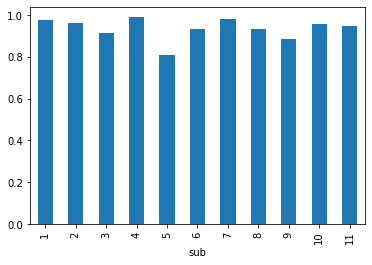

In [ ]:
# let's average correct rate for each participants, and visualize it
#ndata.groupby('sub').agg({'correct':np.mean}).plot.bar()

#if you have only one column to aggregate. the following code will do the same
macc = ndata.groupby('sub').correct.mean()#.plot.bar()
print(macc)
macc.plot.bar()

In [ ]:
# now we want to average RTs for correct trials, separate for sub, target, setsize, and display
mrt = ndata.query('correct == 1')\
  .groupby(  ['sub','target','setsize','Display'])\
    .agg({"resp":"count",
         "rt":["mean","sem"]})\
    .rename(columns={"resp":"count"})\
    .reset_index()
mrt.head()

sub  target setsize  Display count        rt          
                               count      mean       sem
0   1  Absent       8  Dynamic    35  2.566563  0.152087
1   1  Absent       8   Static    35  1.622023  0.089367
2   1  Absent      12  Dynamic    34  3.101724  0.134577
3   1  Absent      12   Static    35  2.053618  0.084191
4   1  Absent      16  Dynamic    32  2.898478  0.106577

Note, when python chains span over multiple lines, take care the indentation and add one '\' at the previous line. 

I think pandas is more difficult for this particular example.
There isn't as natural a way to mix column-agnostic aggregations (like ``count``) with column-specific aggregations like the other two. You end up writing could like `.agg{'resp': 'count'}` which reads, "I want the count of `resp`", even though you don't care about `resp` specifically. You could just as easily have said `.agg('Cond': 'count')`.
Additionally assigning names can't be done as cleanly in pandas; you have to just follow it up with a ``rename`` like before.

The result is a `MultiIndex` in the columns which can be a bit awkard to work with (you can drop a level with `r.columns.droplevel()`). But `MultiIndex` has its own purpose, such as subsecting data (We will see later on). 

In the above example, if you want to read mean RT, you need to use mrt.rt['mean'], because it is muli-level columns. 

In [ ]:
mrt.rt['mean']

0      2.566563
1      1.622023
         ...   
130    0.869591
131    0.795092
Name: mean, Length: 132, dtype: float64

# Explorative analysis of RTs


The example we use is from a visual search study published in 2019:

* Shi, Z., Allenmark, F., Zhu, X., Elliott, M. A., & Müller, H. J. (2019). To quit or not to quit in dynamic search. Attention, Perception & Psychophysics. https://doi.org/10.3758/s13414-019-01857-7

The original data analysis and modelling were done in R. Here we use Python to do similar analysis. 

Explorative data analysis (EDA) often requires you to get familiar with data by various analysis. For RT analyses, usually we do followings:

1. Check RT distributions (outliers)
2. Error rates
3. Mean RTs and relative statistics. 

## Read raw data and RT distributions

Import data as we have shown above. 

In [ ]:
url = 'https://raw.githubusercontent.com/msenselab/dynamic_search/master/data/exp1.csv'
dat = pd.read_csv(url)
dat.head()

,target,setsize,dyn,resp,rt,sub,exp,correct
0,Absent,12,Static,2,2.583007,1,1,1
1,Absent,8,Static,2,0.935967,1,1,1
2,Present,16,Static,1,0.794771,1,1,1
3,Present,8,Static,1,1.241838,1,1,1
4,Absent,12,Static,2,1.759485,1,1,1


sub
1     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2     [[AxesSubplot(0.125,0.125;0.775x0.755)]]
                        ...                   
10    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
11    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Length: 11, dtype: object

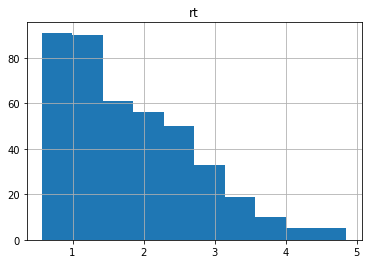

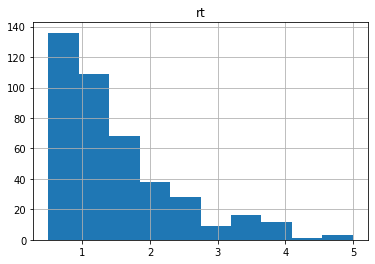

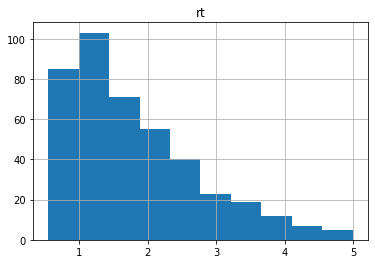

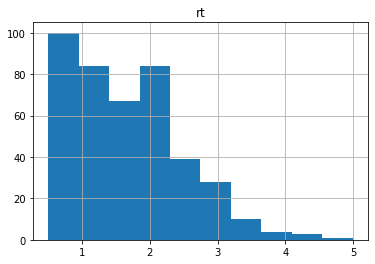

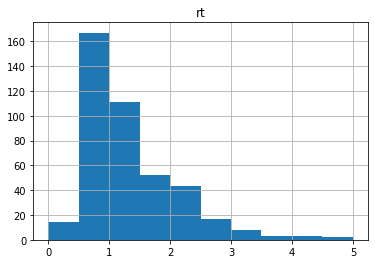

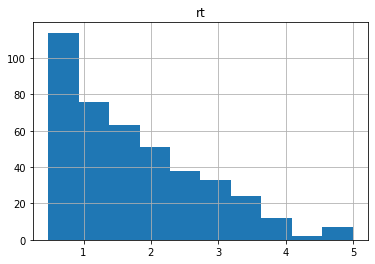

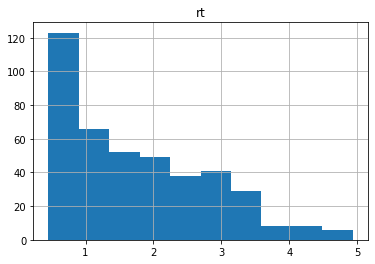

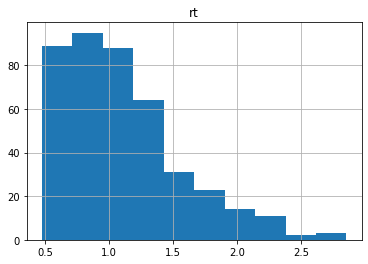

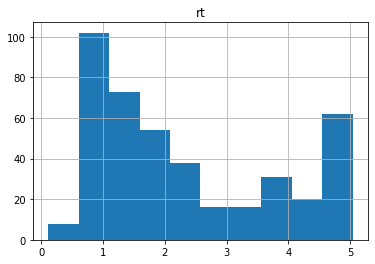

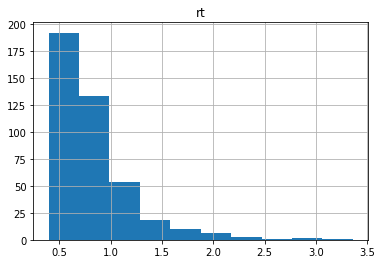

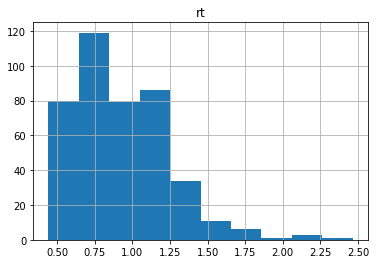

In [ ]:
# do histogram for RT distribution
#dat.hist('rt',by = 'sub')
# the following will do the same job
dat.groupby('sub').hist('rt')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efcf65472e8>,
      dtype=object)

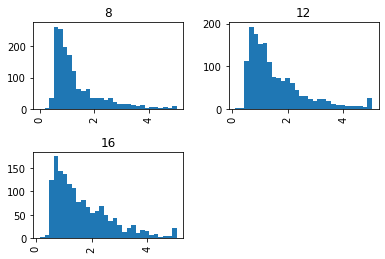

In [ ]:
# check RTs on different setisze
dat.hist('rt',by = 'setsize', bins = 30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efcee790710>,
      dtype=object)

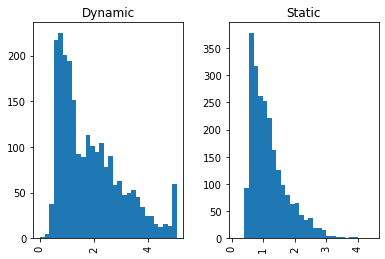

In [ ]:
# your task: check RTs on dynamic vs. static ('dyn' column)
# ....
dat.hist('rt',by = 'dyn', bins = 30)

In [ ]:
# data includes error trials (see the hump at 5 seconds)
# so let's do the accuracy analysis
macc = dat.groupby(['setsize','target','dyn','sub']).correct.mean()
print(macc)

setsize  target   dyn      sub
8        Absent   Dynamic  1      1.000000
                           2      0.914286
                                    ...   
16       Present  Static   10     0.914286
                           11     0.942857
Name: correct, Length: 132, dtype: float64


In [ ]:
macc

setsize  target   dyn      sub
8        Absent   Dynamic  1      1.000000
                           2      0.914286
                           3      1.000000
                           4      0.971429
                           5      0.657143
                                    ...   
16       Present  Static   7      1.000000
                           8      1.000000
                           9      0.971429
                           10     0.914286
                           11     0.942857
Name: correct, Length: 132, dtype: float64

In [ ]:
# visualize macc
# first we average across sub (i.e., keep multiindex level 0, 1,2, see above table)
# then we expand (unstack Display, and target to column)
macc2 = macc.mean(level = [0,1,2]).unstack(level = [1,2])
macc2

target     Absent             Present          
dyn       Dynamic    Static   Dynamic    Static
setsize                                        
8        0.896104  0.994805  0.955844  0.974026
12       0.838961  0.992208  0.935065  0.963636
16       0.841558  0.979221  0.885714  0.955844

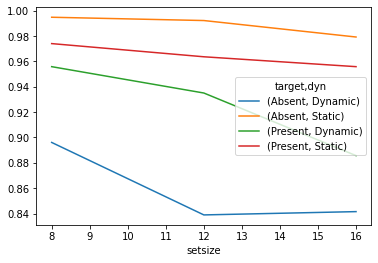

In [ ]:
macc2.plot()

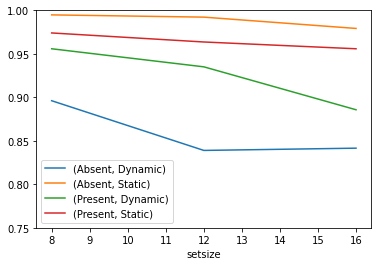

In [ ]:
# Note that we have rows (setsize), and columns multilevels (Target Present/Absent) x Display (Dynamic, Static)
# We then visualize it, each column will be one line. 
ax = macc2.plot( )
plt.ylim([0.75,1])
plt.legend(loc = 'lower left')


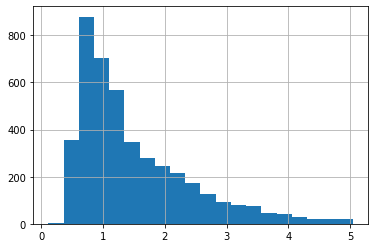

In [ ]:
# we filter the valid data for further analysis
vdat = dat.query('correct == 1')
vdat.rt.hist(bins = 20)

In [ ]:
mrt = dat.query('correct == 1').groupby(['setsize','target','dyn','sub'])\
    .agg({'rt':['mean','sem']}
        )#.mean(level = [0,1,2]).unstack(level = [1,2])

mrt

rt          
                                 mean       sem
setsize target  dyn     sub                    
8       Absent  Dynamic 1    2.566563  0.152087
                        2    2.515756  0.144914
                        3    2.401525  0.125244
                        4    2.118680  0.104073
                        5    1.744670  0.190036
...                               ...       ...
16      Present Static  7    0.899330  0.064893
                        8    0.832591  0.041576
                        9    1.089745  0.061440
                        10   0.866280  0.055461
                        11   0.795092  0.045105

[132 rows x 2 columns]

In [ ]:
# we do the same as for accuracy:
# average acorss subject, expand to columns for (target and display)
mrt2 = mrt.mean(level = [0,1,2]).unstack(level=[1,2])
mrt2

rt                      ...                              
             mean                      ...       sem                    
target     Absent             Present  ...    Absent   Present          
dyn       Dynamic    Static   Dynamic  ...    Static   Dynamic    Static
setsize                                ...                              
8        2.208454  1.177113  1.178920  ...  0.062346  0.093851  0.036742
12       2.433945  1.554864  1.318243  ...  0.077407  0.109111  0.051305
16       2.495611  1.788847  1.415677  ...  0.082156  0.119519  0.054581

[3 rows x 8 columns]

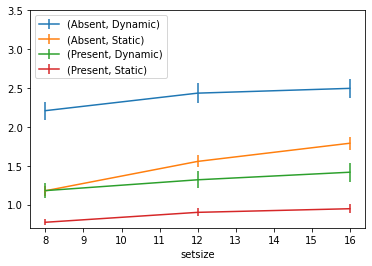

In [ ]:
# now let's visualize with error bars
mrt2.rt['mean'].plot(yerr=mrt2.rt['sem'])
plt.ylim([0.7,3.5])
plt.legend(loc = 'upper left')

## Statistics: RM ANOVA with statmodels

[statsmodels](https://www.statsmodels.org/stable/index.html) is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at statsmodels.org.

Here we only mention one function `AnovaRM()`, which is very often used in within-subject design experiments. Currently, only fully balanced within-subject designs are supported. Calculation of between-subject effects and corrections for violation of sphericity are not yet implemented.

**Input Parameters**

* data: DataFrame
* depvar: The dependent variable in data
* subject: Specify the subject id
* within: The within-subject factors
* between: The between-subject factors, this is not yet implemented
* aggregate_func: {None, ‘mean’, callable}
If the data set contains more than a single observation per subject and cell of the specified model, this function will be used to aggregate the data before running the Anova. None (the default) will not perform any aggregation; ‘mean’ is s shortcut to numpy.mean. An exception will be raised if aggregation is required, but no aggregation function was specified.


In [ ]:
from statsmodels.stats.anova import AnovaRM
mrt0 = mrt.copy() # here copy the table, making sure multiple run of the following code isn't a problem
#we want to flat the multiple levels into one level columns
mrt0.columns = mrt0.columns.map('_'.join) # change column names by combine multiple level names 
mrt0=mrt0.reset_index() # change multi-index into columns
mrt0

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,setsize,target,dyn,sub,rt_mean,rt_sem
0,8,Absent,Dynamic,1,2.566563,0.152087
1,8,Absent,Dynamic,2,2.515756,0.144914
2,8,Absent,Dynamic,3,2.401525,0.125244
3,8,Absent,Dynamic,4,2.118680,0.104073
4,8,Absent,Dynamic,5,1.744670,0.190036
...,...,...,...,...,...,...
127,16,Present,Static,7,0.899330,0.064893
128,16,Present,Static,8,0.832591,0.041576
129,16,Present,Static,9,1.089745,0.061440
130,16,Present,Static,10,0.866280,0.055461


In [ ]:
aovrm = AnovaRM(mrt0, 'rt_mean','sub',within = ['setsize','target','dyn'])
res = aovrm.fit()
print(res)

                     Anova
                   F Value Num DF  Den DF Pr > F
------------------------------------------------
setsize            52.6811 2.0000 20.0000 0.0000
target             45.5424 1.0000 10.0000 0.0001
dyn                19.0085 1.0000 10.0000 0.0014
setsize:target     12.9475 2.0000 20.0000 0.0002
setsize:dyn         3.3114 2.0000 20.0000 0.0572
target:dyn          9.8088 1.0000 10.0000 0.0107
setsize:target:dyn  6.4267 2.0000 20.0000 0.0070

